Import des librairies

In [5]:
from matplotlib import pyplot as plt
import numpy as np

Fonction permettant de dessiner les courbes de niveaux d'une fonction de 2 variables

In [1]:
def courbes_de_niveaux(fct, x1_min=-5, x2_min=-5, x1_max=5, x2_max=5, optimal=None, bar=True, ax=None, **kwargs):
    x1_values = np.linspace(x1_min, x1_max,100)
    x2_values = np.linspace(x2_min, x2_max,100)
    fct_values = np.array([[fct(x1,x2) for x1 in x1_values] for x2 in x2_values])
    #set_current_axes(ax)
    if 'cmap' not in kwargs: kwargs['cmap'] = 'RdBu'
    plt.contour(x1_values, x2_values, fct_values, 40, **kwargs)
    plt.xlim((x1_min, x1_max))
    plt.ylim((x2_min, x2_max))
    if bar:
        plt.colorbar()
    if optimal is not None: 
        plt.scatter(*optimal, s=200, marker='*', c='r')



Fonction permettant de dessiner la trajectoire de l'algorithme

In [25]:
# w_list sous la forme d'une liste  coordonnées [[w00,b0],[w01,b1],...]
def trajectoire(w_list, fct, x1_min=-5, x1_max=5,x2_min=-5,x2_max=5, w_opt=None, ax=None):
    show_2d_function(fct, x1_min=-5, x1_max=5,x2_min=-5,x2_max=5, optimal=w_opt, ax=ax)     
    if len(w_list) > 0:
        trajectory = np.array(w_list)
        plt.plot(trajectory[:,0], trajectory[:,1], 'o--')
    plt.title('Trajectoire de la descente en gradient')
    plt.xlabel('$w_1$')
    plt.ylabel('$w_2$')

Fonction $f(w_0,b)$ à optimiser et son gradient

In [11]:
def f(w0,b):
  return (w0*3+b-4)**2+(w0*1+b-0)**2+(w0*7+b-6)**2
def df(w0,b):
  return [2*(w0*3+b-4)*3+2*(w0*1+b-0)*1+2*(w0*7+b-6)*7,2*(w0*3+b-4)*1+2*(w0*1+b-0)*1+2*(w0*7+b-6)*1]

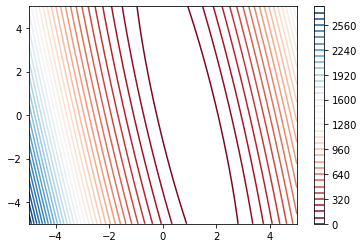

In [12]:
show_2d_function(f)

Algorithme

In [21]:
def descente(gradf,X0,tau=0.01,tolerance=1e-6,Nbiterations=1000):
    x=X0[0]
    y=X0[1]
    L=[]
    for i in range(Nbiterations):
        g = gradf(x,y)
        if g[0]**2+g[1]**2< tolerance:
            return L
        L.append([x,y])
        x=x-tau*g[0]
        y=y-tau*g[1]
    print('L\'algorithme n\'a pas convergé')
    return L

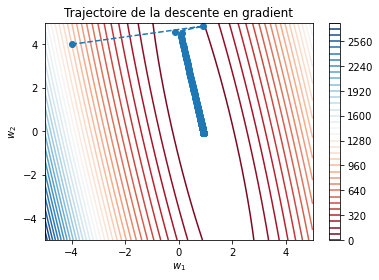

In [26]:
Xi=descente(df,[-4,4])
show_2d_trajectory(Xi,f)

Solution

In [ ]:
print([X[0]-eta*gradX[0],X[1]-eta*gradX[1]])

[93058218171.7436, 17623686095.000557]


Représentation graphique de l'algorithme

<function matplotlib.pyplot.show>

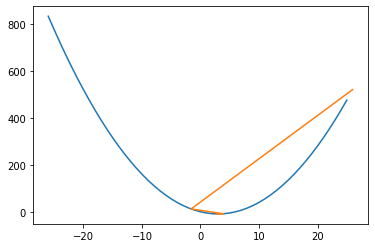

In [ ]:
xxx= range(-round(x0),round(x0))
plt.plot(xxx,[f(xi) for xi in xxx]) # Représentation de la fonction sur [-x0,x0]
plt.plot(xi,yi) # Représentation des segments (x_i,y_i)--(x_(i+1),y_(i+1))
plt.show

In [ ]:
print(x0,0.5*(2*x0-4),x0-0.5*(2*x0-4))

29 27.0 2.0
